# Support Vector Classifier 

neste projeto, o support vector machine foi usado para classificar as espécie de flores com base no conjunto de dados iris.


---

# Dados

   - **'sepal_length'**: comprimento sépala em cm.
   - **'sepal_width'**: largura sépala em cm.
   - **'petal_length'**: comprimento da pétala em cm.
   - **'petal_width'**: largura da pétala em cm.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from pandas_profiling import ProfileReport

In [2]:
iris = pd.read_csv('../input/iris/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
report = ProfileReport(iris)
report

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Análise exploratória de dados

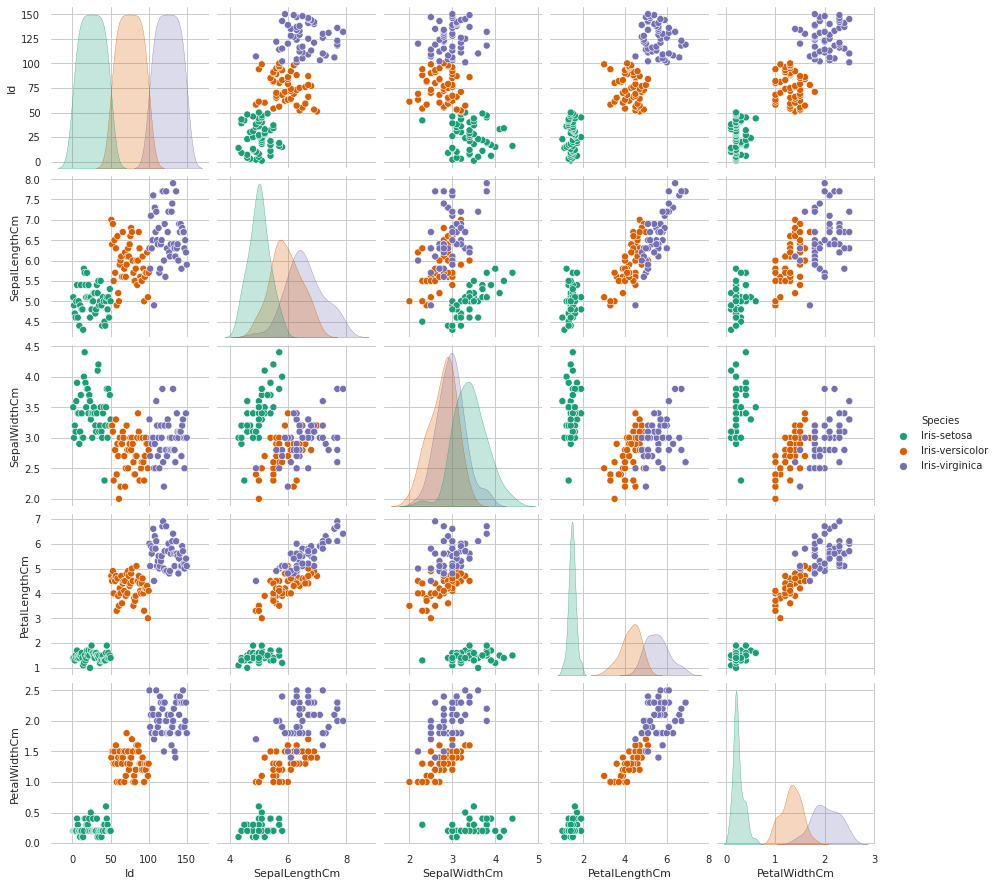

In [4]:
sns.set_style('whitegrid')
sns.pairplot(iris,hue='Species',palette='Dark2')

## Treinando o modelo

In [5]:
X = iris.drop('Species',axis=1)
y = iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [6]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

## Previsões e avaliações

In [7]:
predictions = svc_model.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[16  0  0]
 [ 0 12  0]
 [ 0  0 17]]


In [8]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        17

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



## Gridsearch 
 - O gridsearch aumenta a precisão do modelo procurando o valor mais adequado de  **gamma** e **C** para o conjunto de dados.

In [9]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [10]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[16  0  0]
 [ 0 12  0]
 [ 0  0 17]]


In [11]:
print(classification_report(y_test,grid_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        17

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



  - Neste conjunto de dados não Houve mudança no resultado final devido ao conjunto de dados ser muito pequeno.